In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def load_dataset():
    return pd.read_csv('googleplaystore.csv')
dataset = load_dataset()
#this function will load dataset.
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
def print_summarize_dataset(dataset):
    print('Dataset dimension:')
    print(dataset.shape)
    print()
    print('First 10 rows of dataset:')
    print(dataset.head(10))
    print()
    print('Statistical summary:')
    print(dataset.describe(include='all'))
print_summarize_dataset(dataset)
#this function will summarize dataset.

Dataset dimension:
(10841, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0 

In [18]:
def clean_dataset(dataset):
    return dataset.dropna()
dataset = clean_dataset(dataset)
#his function will clean dataset.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


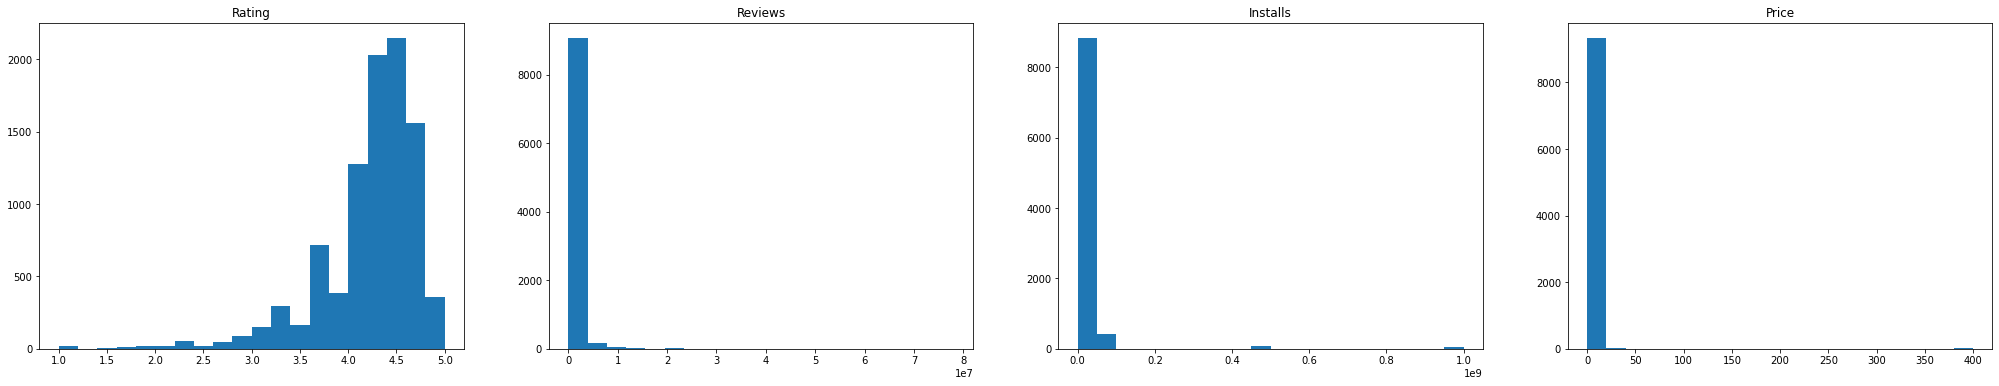

In [19]:
def print_histograms(dataset):
    dataset.Reviews = dataset.Reviews.astype(int)
    dataset.Installs = dataset.Installs.str.replace('+', '', regex=True)
    dataset.Installs = dataset.Installs.str.replace(',', '', regex=True).astype(int)
    dataset.Price = dataset.Price.str.replace('$', '', regex=True).astype(float)
    fig, axs = plt.subplots(nrows=1,ncols=4,figsize=(35,6))
    axs[0].hist(dataset['Rating'],bins=20)
    axs[0].set_title('Rating')
    axs[1].hist(dataset['Reviews'],bins=20)
    axs[1].set_title('Reviews')
    axs[2].hist(dataset['Installs'],bins=20)
    axs[2].set_title('Installs')
    axs[3].hist(dataset['Price'],bins=20)
    axs[3].set_title('Price')
    plt.show()
print_histograms(dataset)
#This function will print histograms of column from dataset.

In [20]:
def compute_correlations_matrix(dataset):
    return dataset.corr()
compute_correlations_matrix(dataset)
#This function will compute correlations.

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068133,0.051337,-0.021919
Reviews,0.068133,1.000000,0.641605,-0.009824
Installs,0.051337,0.641605,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.011895,1.000000


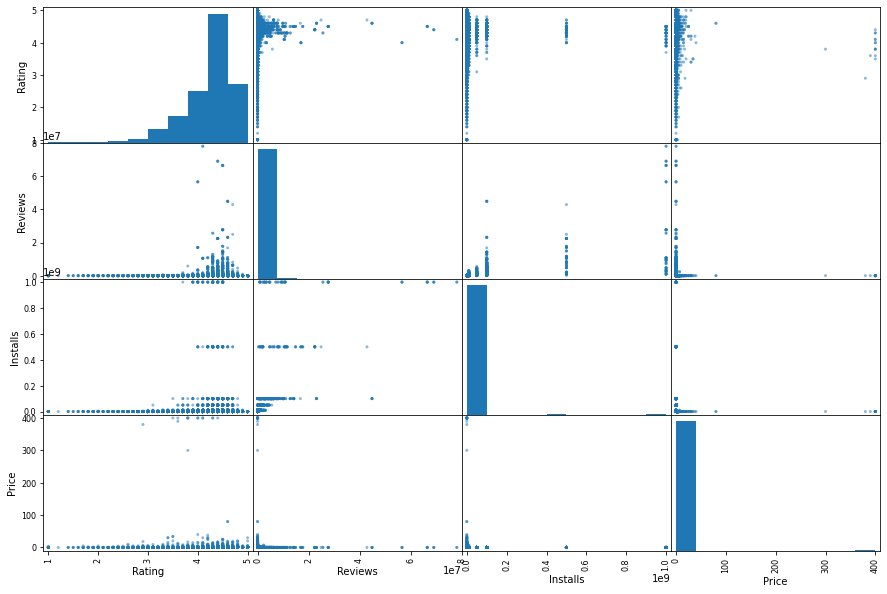

In [21]:
def print_scatter_matrix():
    pd.plotting.scatter_matrix(dataset,figsize=(15,10))
print_scatter_matrix()
#This function will print scatter matrix.

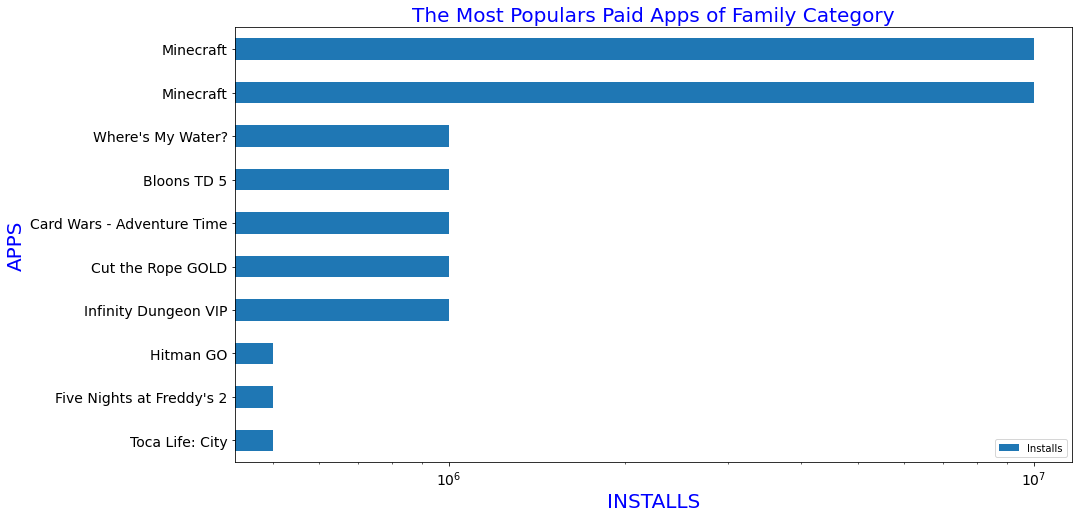

In [22]:
dataset_bar = dataset[dataset['Category'] == 'FAMILY']
dataset_bar = dataset_bar[dataset_bar['Type'] == 'Paid']
most_paid = dataset_bar.sort_values(by=['Installs'], ascending=False)[:10]
ax = most_paid.plot.barh(x='App', y='Installs', rot=0, figsize=(15,8), logx=True,fontsize = 14)
plt.xlabel('INSTALLS', fontsize=20, c = 'b')
plt.ylabel('APPS', fontsize=20 , c = 'b')
plt.gca().invert_yaxis()
plt.title('The Most Populars Paid Apps of Family Category',fontsize=20,c='b')
plt.show()
#Plot with bar diagram the most populars paid apps of Family category.

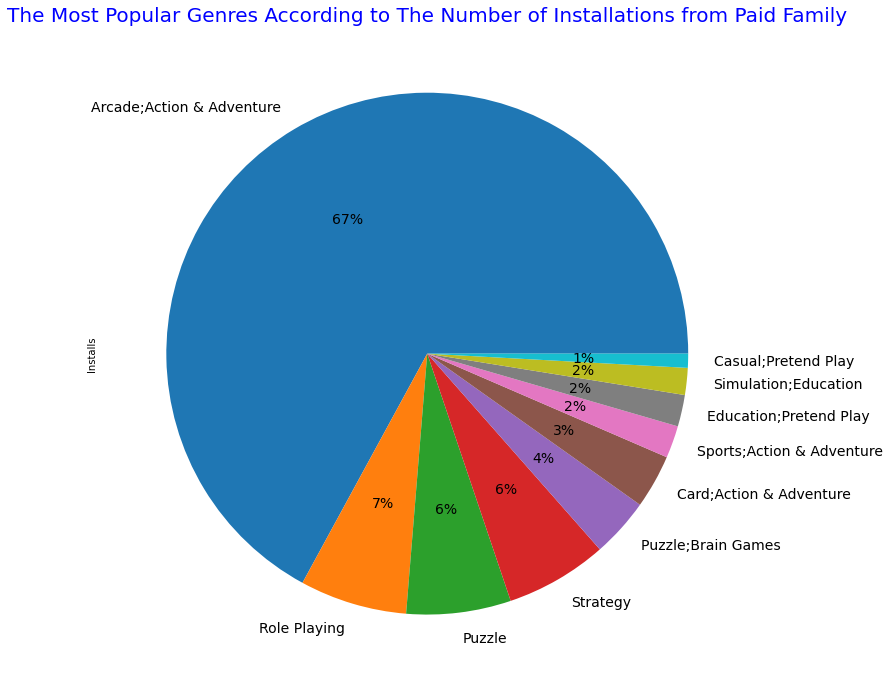

In [23]:
genres = dataset_bar.groupby('Genres')['Installs'].sum().sort_values(ascending=False)[:10]
genres.plot(kind='pie',figsize = (17,12),autopct='%1.0f%%',fontsize = 14)
plt.title('The Most Popular Genres According to The Number of Installations from Paid Family',c='b',fontsize = 20)
plt.show()
#Plot with a pie diagram the most popular genres according to the number of installations from paid family.

In [24]:
array  = dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False)
array.values
#An array with the number of installation per category.

array([35085862717, 32647241530, 14176070180, 14069841475, 11450224500,
       10257651590, 10088243130,  7496210650,  6868859300,  6221897200,
        3247831540,  2869160000,  2325341930,  1921291655,  1751131465,
        1583056220,  1001768120,   876612400,   871352000,   724267560,
         537561120,   426096500,   273777750,   264295110,   168582000,
         124228100,    61083000,    56036100,    53205576,    53129800,
          31116110,    26916200,    15949410])

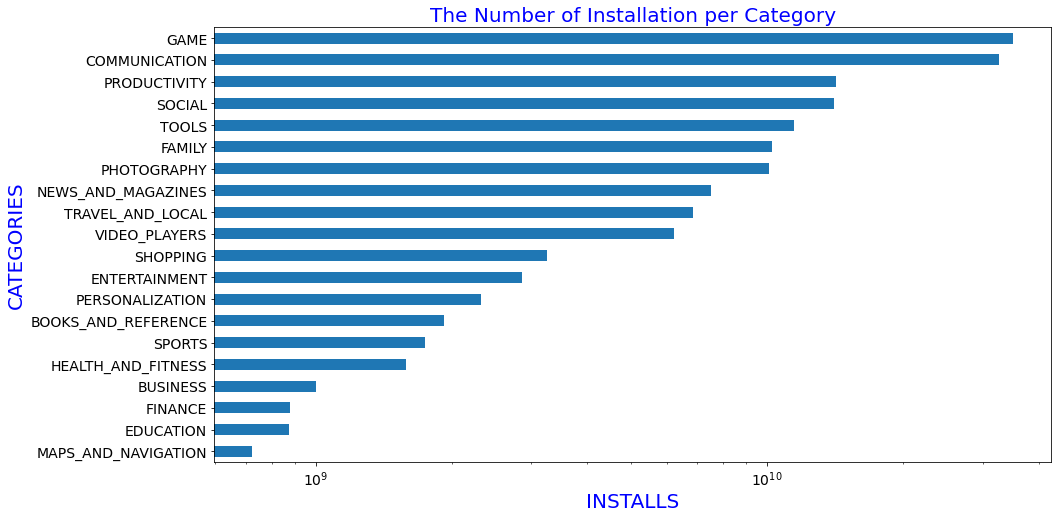

In [25]:
bar_category = dataset.groupby(by=['Category'])['Installs'].sum().sort_values(ascending=False)[:20]
bar_category.plot.barh(x='Category', y='Installs', rot=0, figsize=(15,8), logx=True,fontsize = 14)
plt.xlabel('INSTALLS', fontsize=20, c = 'b')
plt.ylabel('CATEGORIES', fontsize=20 , c = 'b')
plt.title('The Number of Installation per Category',c = 'b',fontsize = 20)
plt.gca().invert_yaxis()
plt.show()

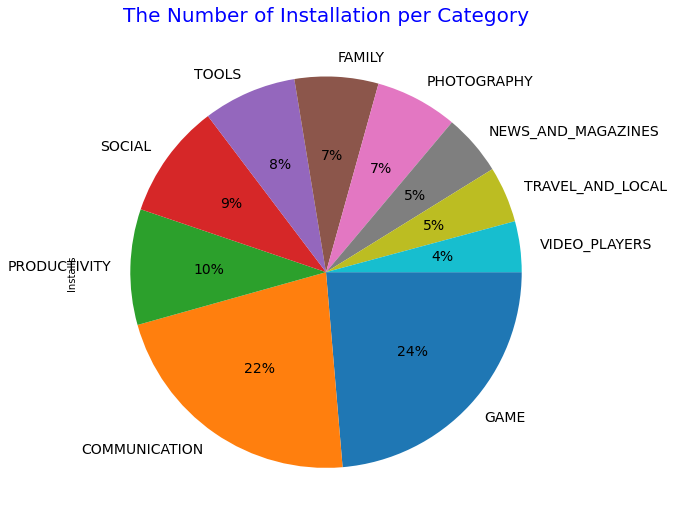

In [26]:
pie_category = dataset.groupby(by=['Category'])['Installs'].sum().sort_values(ascending=False)[:10]
pie_category.plot(kind='pie',figsize = (15,9),autopct='%1.0f%%',fontsize = 14)
plt.title('The Number of Installation per Category',c = 'b',fontsize = 20)
plt.gca().invert_yaxis()
plt.show()
# Plot a pie with the number of installation per category

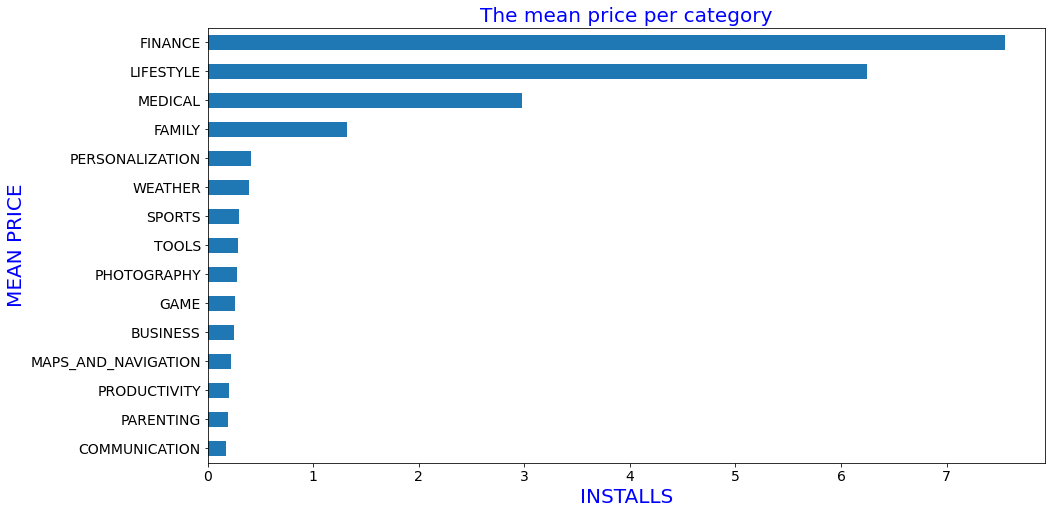

In [28]:
pie_category = dataset.groupby('Category')['Price'].mean().sort_values(ascending = False)[:15]
pie_category.plot.barh(rot=0, figsize=(15,8),fontsize = 14)
plt.xlabel('INSTALLS', fontsize=20, c = 'b')
plt.ylabel('MEAN PRICE', fontsize=20 , c = 'b')
plt.gca().invert_yaxis()
plt.title('The mean price per category',fontsize=20,c = 'b')
plt.show()
#Plot a bar with the mean price per category.

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
mostex_category = dataset.groupby(['Category'])['App','Price'].max().sort_values(by=['Price'],ascending = False)
mostex_category
# Most expensive apps per category.

,App,Price
Category,,
LIFESTYLE,💎 I'm rich,400.00
FINANCE,İşCep,399.99
FAMILY,英漢字典 EC Dictionary,399.99
MEDICAL,tökr,79.99
SPORTS,"theScore: Live Sports Scores, News, Stats & Vi...",29.99
PHOTOGRAPHY,love,19.99
BUSINESS,sABN,17.99
GAME,► MultiCraft ― Free Miner! 👍,17.99
TOOLS,📏 Smart Ruler ↔️ cm/inch measuring for homework!,14.99
